In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('mendota_secchi_depth.txt', delimiter='\t')
x = df['day_of_year']
y = df['secchi_depth']

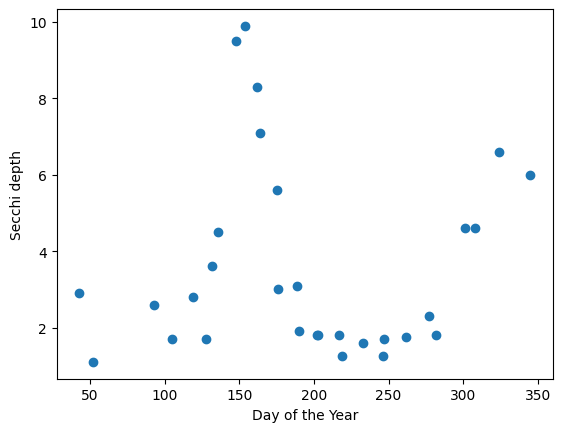

In [3]:
# plot result
plt.scatter(x,y)
plt.xlabel('Day of the Year')
plt.ylabel('Secchi depth')
plt.show()

In [4]:
# Kernel fitting to data
sigma = 10 #defines Gaussian kernel width
lam = 0.01 #ridge regression parameter
n = 30

distsq=np.zeros((n,n),dtype=float)

for i in range(0,n):
    for j in range(0,n):
        distsq[i,j]=(x[i]-x[j])**2
        
K = np.exp(-distsq/(2*sigma**2))

alpha = np.linalg.inv(K+lam*np.identity(n))@y

Sigma =  10
Lambda =  0.01


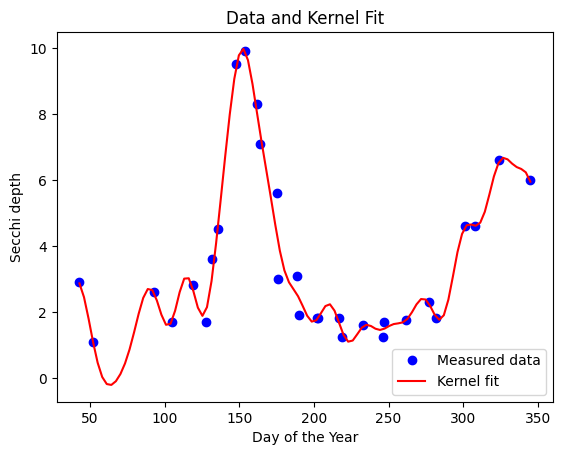

In [5]:
# Generate smooth curve corresponding to data fit
p = 100
x_test = np.linspace(min(x),max(x),p)  # uniformly sample interval 

distsq_xtest = np.zeros((p,n),dtype=float)
for i in range(0,p):
    for j in range(0,n):
        distsq_xtest[i,j] = (x_test[i]-x[j])**2
        
dtest = np.exp(-distsq_xtest/(2*sigma**2))@alpha

print('Sigma = ',sigma)
print('Lambda = ',lam)
plt.plot(x,y,'bo',label='Measured data')
plt.plot(x_test,dtest,'r',label='Kernel fit')
plt.title('Data and Kernel Fit')
plt.legend(loc='lower right')
plt.xlabel('Day of the Year')
plt.ylabel('Secchi depth')
plt.show()

Sigma =  10
Lambda =  0.5


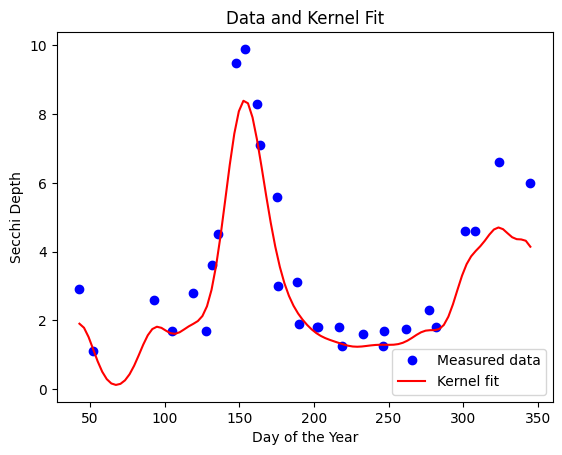

In [14]:
# Kernel fitting to data
sigma = 10 #defines Gaussian kernel width
lam = 0.5 #ridge regression parameter
n = 30

distsq=np.zeros((n,n),dtype=float)

for i in range(0,n):
    for j in range(0,n):
        distsq[i,j]=(x[i]-x[j])**2
        
K = np.exp(-distsq/(2*sigma**2))

alpha = np.linalg.inv(K+lam*np.identity(n))@y

# Generate smooth curve corresponding to data fit
p = 100
x_test = np.linspace(min(x),max(x),p)  # uniformly sample interval 

distsq_xtest = np.zeros((p,n),dtype=float)
for i in range(0,p):
    for j in range(0,n):
        distsq_xtest[i,j] = (x_test[i]-x[j])**2
        
dtest = np.exp(-distsq_xtest/(2*sigma**2))@alpha

print('Sigma = ',sigma)
print('Lambda = ',lam)
plt.plot(x,y,'bo',label='Measured data')
plt.plot(x_test,dtest,'r',label='Kernel fit')
plt.title('Data and Kernel Fit')
plt.legend(loc='lower right')
plt.xlabel('Day of the Year')
plt.ylabel('Secchi Depth')
plt.show()